Using 2024 data I have already pulled for:

1. Makeup Flow Daily Totalizer
2. Building level attributes (Flow, DeltaT,Mix Temp, StationCO)
3. Weather (Heat Index)

All of this data is being pulled for 2 hourly average for the whole year.



In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Load datasets ---
weather = pd.read_csv("/content/drive/My Drive/CW Data/weather_data_2024.csv", parse_dates=["Timestamp"])
makeup = pd.read_csv("/content/drive/My Drive/CW Data/makeup_data_2024.csv", parse_dates=["Timestamp"])


buildings = pd.read_csv(
    "/content/drive/My Drive/CW Data/summary_data_2024.csv",
    names=["Building", "Meter", "Timestamp", "Flow", "DeltaT", "MixTemp", "StationCO"],
)
buildings.dropna(inplace=True)

buildings['Timestamp'] = pd.to_datetime(buildings['Timestamp'])


Drop NAs, also check NA rows per data frame

In [ ]:
weather.dropna(inplace=True)
makeup.dropna(inplace=True)
buildings.dropna(inplace=True)

In [ ]:
buildings

,Building,Meter,Timestamp,Flow,DeltaT,MixTemp,StationCO
0,Adler Journalism and Mass Communication Building,CWP_AJB_C70,2024-01-01 00:00:00+00:00,0.000000,-0.179648,74.038954,0.000000
1,Adler Journalism and Mass Communication Building,CWP_AJB_C70,2024-01-01 02:00:00+00:00,0.000000,-0.204985,73.992007,0.000000
2,Adler Journalism and Mass Communication Building,CWP_AJB_C70,2024-01-01 04:00:00+00:00,0.000000,-0.231368,73.945090,0.000000
3,Adler Journalism and Mass Communication Building,CWP_AJB_C70,2024-01-01 06:00:00+00:00,0.000000,-0.248700,73.944420,0.000000
4,Adler Journalism and Mass Communication Building,CWP_AJB_C70,2024-01-01 08:00:00+00:00,0.000000,-0.231535,73.985485,0.000000
...,...,...,...,...,...,...,...
548870,Westlawn,CWP_WL_C50,2024-12-31 12:00:00+00:00,123.324422,8.192183,46.719623,34.345369
548871,Westlawn,CWP_WL_C50,2024-12-31 14:00:00+00:00,127.107086,8.333845,46.779826,36.709066
548872,Westlawn,CWP_WL_C50,2024-12-31 16:00:00+00:00,127.558682,8.273788,46.826048,34.963314
548873,Westlawn,CWP_WL_C50,2024-12-31 18:00:00+00:00,129.710579,8.168862,46.611855,33.284277


In [ ]:
building_wide = buildings.pivot_table(
    index="Timestamp",
    columns=["Building", "Meter"],
    values=["Flow", "DeltaT", "StationCO"]
)
# Flatten multi-index
building_wide.columns = [f"{b}_{m}_{f}" for f, b, m in building_wide.columns]


Merge the three data frames

In [ ]:
# Merge weather + makeup (one-to-one on timestamp), renaming columns
combined_df = pd.merge(
    weather.rename(columns={'values': 'heatIndex'}),  # Rename 'values' to 'weather'
    makeup.rename(columns={'values': 'makeupFlow'}),   # Rename 'values' to 'makeup'
    on='Timestamp',  # Merge on the common 'Timestamp' column
    how="inner"
)
# Merge building data (many-to-one per timestamp) separately
full_df = pd.merge(building_wide, combined_df, on="Timestamp", how="inner")

print("Merged shape:", full_df.shape)
full_df

Merged shape: (4391, 369)


,Timestamp,Adler Journalism and Mass Communication Building_CWP_AJB_C70_DeltaT,Art Building West_CWP_ABW_C72_DeltaT,Art Building West_CWP_ABW_C73_DeltaT,Becker Communication Studies Building_CWP_BCSB_C49_DeltaT,Biology Building_CWP_BB_C45_DeltaT,Biology Building_CWP_BB_C57_DeltaT,Biology Building East_CWP_BBE_C27_DeltaT,Blank Honors Center_CWP_BHC_C34_DeltaT,Bowen Science Building_CWP_BSB_C06_DeltaT,...,University Capitol Centre_CWP_UCC_C81_StationCO,Van Allen Hall_CWP_VAN_C47_StationCO,Visual Arts Building_CWP_VAB_C111_StationCO,Voxman Music Building_CWP_VOX_C113_StationCO,Wendell Johnson Speech and Hearing Center_CWP_SHC_C51_StationCO,West Campus Transportation Center_CWP_WCTC_C102_StationCO,West Campus Transportation Center_CWP_WCTC_C103_StationCO,Westlawn_CWP_WL_C50_StationCO,heatIndex,makeupFlow
0,2024-01-01 00:00:00+00:00,-0.179648,17.898480,17.889960,2.696788,18.746258,18.449501,0.621474,1.640799,16.016681,...,17.0,2.0,10.208162,23.026074,0.0,23.0,0.00,33.037111,31.366206,49.892696
1,2024-01-01 02:00:00+00:00,-0.204985,17.882529,17.870768,2.695190,18.789511,18.425484,0.620119,1.718685,15.821861,...,17.0,2.0,10.200169,26.324547,0.0,23.0,0.00,15.126785,30.603191,29.944443
2,2024-01-01 04:00:00+00:00,-0.231368,17.855629,17.845461,2.693023,18.636007,18.408477,0.617461,1.742344,15.533887,...,17.0,2.0,10.192790,23.684429,0.0,23.0,0.00,0.136699,30.111402,9.996189
3,2024-01-01 06:00:00+00:00,-0.248700,17.821173,17.815928,2.683875,18.799760,18.395908,0.596764,1.718122,15.497216,...,17.0,2.0,10.159644,15.227475,0.0,23.0,0.00,0.273738,29.257461,76.633778
4,2024-01-01 08:00:00+00:00,-0.231535,17.786718,17.786394,2.674637,18.781641,18.405210,0.595243,1.698661,15.461203,...,17.0,2.0,10.108072,13.504168,0.0,23.0,0.00,0.410776,27.798996,205.004696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4386,2024-12-31 12:00:00+00:00,-0.141944,8.446974,8.446975,2.529211,18.643672,0.407176,0.849201,1.603438,5.125092,...,17.0,2.0,0.004018,0.450388,0.0,23.0,0.01,34.345369,33.973024,0.679975
4387,2024-12-31 14:00:00+00:00,-0.171724,8.513152,8.513153,2.512459,18.617213,0.407392,0.849432,1.600515,5.207637,...,17.0,2.0,0.004256,0.814639,0.0,23.0,0.01,36.709066,34.421783,0.704708
4388,2024-12-31 16:00:00+00:00,-0.177810,8.579330,8.579331,2.490795,18.729096,0.420419,0.844466,1.598993,5.191776,...,17.0,2.0,0.004495,0.014798,0.0,23.0,0.01,34.963314,35.070640,0.729441
4389,2024-12-31 18:00:00+00:00,-0.206668,8.645292,8.645293,2.468623,18.641830,0.423949,0.859950,1.589430,5.132245,...,17.0,2.0,0.004733,0.043341,0.0,23.0,0.01,33.284277,35.126414,0.754174


Data preprocessing

In [ ]:
constant_cols = full_df.columns[full_df.std() == 0]
print("Dropping constant columns:", list(constant_cols))
full_df = full_df.drop(columns=constant_cols)


full_df = full_df.dropna()
print("Remaining NaNs?", full_df.isna().sum().sum())  # Should be 0


Dropping constant columns: ['Gilmore Hall_CWP_GILH_C59_DeltaT', 'Hansen Football Performance Center_CWP_HFPC_C105_DeltaT', 'Gilmore Hall_CWP_GILH_C59_Flow', 'Hansen Football Performance Center_CWP_HFPC_C105_Flow', 'Gilmore Hall_CWP_GILH_C59_StationCO', 'Hansen Football Performance Center_CWP_HFPC_C105_StationCO', 'Spence Labs_CWP_SLP_C79_StationCO']
Remaining NaNs? 0


In [ ]:
# Keep timestamp separately for later reference
timestamps = full_df['Timestamp']
full_df = full_df.drop(columns=['Timestamp'])

# Scale features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(full_df)


In [ ]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(full_df)
X = pd.DataFrame(scaled_values, columns=full_df.columns, index=full_df.index)


In [ ]:
import numpy as np
def create_sequences(data, window_size=24):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append(data.iloc[i:i+window_size].values)
    return np.array(sequences)

X_seq = create_sequences(X, window_size=24)

# Save matching timestamps for interpretation later
timestamps_seq = timestamps[24:].reset_index(drop=True)

In [ ]:
print(X_seq.shape)  # (n_samples, 24, 366)


(4090, 24, 361)


In [ ]:
import numpy as np

print("NaNs:", np.isnan(X_seq).any())
print("Infs:", np.isinf(X_seq).any())
print("Shape:", X_seq.shape)


NaNs: False
Infs: False
Shape: (4090, 24, 361)


Modeling Step - LSTM based Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
timesteps = X_seq.shape[1]       # = 24
num_features = X_seq.shape[2]    # = 366

# Encoder
input_layer = Input(shape=(timesteps, num_features))
encoded = LSTM(128, activation='relu', return_sequences=True)(input_layer)
encoded = LSTM(64, activation='relu')(encoded)

# Bottleneck
bottleneck = RepeatVector(timesteps)(encoded)

# Decoder
decoded = LSTM(64, activation='relu', return_sequences=True)(bottleneck)
decoded = LSTM(128, activation='relu', return_sequences=True)(decoded)
output_layer = TimeDistributed(Dense(num_features))(decoded)

# Define model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 24, 361)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 24, 128)             │         250,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 24, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 24, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 24, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 24, 361)             │          46,569 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 478,697 (1.83 MB)

 Trainable params: 478,697 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

print("Any NaNs?", np.isnan(X_seq).any())
print("Any Infs?", np.isinf(X_seq).any())
print("Min:", np.min(X_seq))

print("Max:", np.max(X_seq))

import pandas as pd

print("Zero-variance features:")
print((full_df.std() == 0).sum())



Any NaNs? False
Any Infs? False
Min: 0.0
Max: 1.0000000000000002
Zero-variance features:
0


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = autoencoder.fit(
    X_seq, X_seq,                   # Input and output are same
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
    callbacks=[early_stop]
)

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - loss: 0.1508 - val_loss: 0.0186
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - loss: 0.0135 - val_loss: 0.0175
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - loss: 0.0126 - val_loss: 0.0166
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 138ms/step - loss: 0.0120 - val_loss: 0.0157
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 23s 157ms/step - loss: 0.0111 - val_loss: 0.0150
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - loss: 0.0108 - val_loss: 0.0153
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - loss: 0.0105 - val_loss: 0.0148
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - loss: 0.0101 - val_loss: 0.0153
Epoch 9/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - loss: 0.0093 - val_loss: 0.0155
Epoch 10/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - loss: 0.0079 - val_loss: 0.0155
Epoch 11/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - loss: 0.0075 - val_loss: 0.0152
Epoch 12/50
116/116

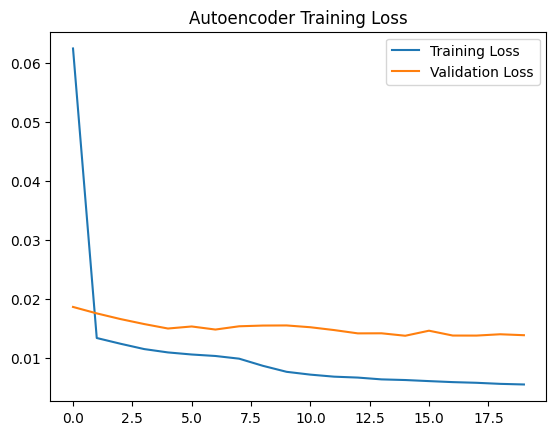

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Autoencoder Training Loss")
plt.show()


In [ ]:
reconstructed = autoencoder.predict(X_seq)


128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step


In [ ]:
import numpy as np

# MSE for each window across all timesteps & features
reconstruction_errors = np.mean((X_seq - reconstructed) ** 2, axis=(1, 2))


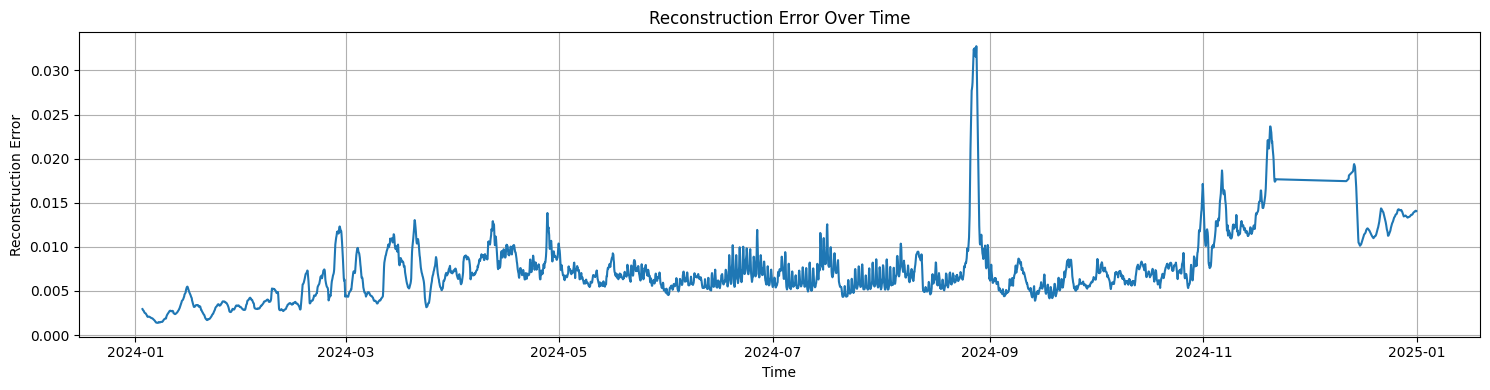

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot(timestamps_seq, reconstruction_errors)
plt.title("Reconstruction Error Over Time")
plt.xlabel("Time")
plt.ylabel("Reconstruction Error")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Convert timestamps to datetime if not already
timestamps_seq = pd.to_datetime(timestamps_seq)

# Create a DataFrame for easy slicing
recon_df = pd.DataFrame({
    "timestamp": timestamps_seq,
    "error": reconstruction_errors
})

# Filter for May
may_errors = recon_df[(recon_df["timestamp"] >= "2024-05-01") & (recon_df["timestamp"] < "2024-06-01")]


In [ ]:
# X_seq: original data
# X_pred: reconstruction
X_pred = autoencoder.predict(X_seq)

# Per-timestep, per-feature MSE
reconstruction_errors_per_feature = np.mean((X_pred - X_seq)**2, axis=1)  # shape: (samples, features)

# Re-wrap in a dataframe
feature_errors_df = pd.DataFrame(
    reconstruction_errors_per_feature,
    columns=full_df.columns,
)
feature_errors_df['Timestamp'] = timestamps_seq


128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step


In [ ]:
# Assuming `feature_errors_df` has Timestamp and all building+meter+feature cols

may_leak = feature_errors_df[
    (feature_errors_df["Timestamp"] >= "2024-05-01") &
    (feature_errors_df["Timestamp"] < "2024-06-01")
].copy()

# Add original makeupFlow to match timestamps
makeup_may = makeup[(makeup["Timestamp"] >= "2024-05-01") & (makeup["Timestamp"] < "2024-06-01")]

may_leak = pd.merge(may_leak, makeup_may, on="Timestamp", how="left")
may_leak = may_leak[may_leak['values'] > 10000]  # Only high makeup


In [ ]:
makeup_may

,Timestamp,values
1452,2024-05-01 00:00:00+00:00,23405.465021
1453,2024-05-01 02:00:00+00:00,25939.515491
1454,2024-05-01 04:00:00+00:00,27594.468142
1455,2024-05-01 06:00:00+00:00,2093.300696
1456,2024-05-01 08:00:00+00:00,5000.168098
...,...,...
1819,2024-05-31 14:00:00+00:00,9279.247102
1820,2024-05-31 16:00:00+00:00,10606.935166
1821,2024-05-31 18:00:00+00:00,10965.641771
1822,2024-05-31 20:00:00+00:00,11307.100470


In [ ]:
from collections import defaultdict

flow_building_errors = defaultdict(float)
deltat_building_errors = defaultdict(float)
stationco_building_errors = defaultdict(float)

for col in may_leak.columns:
    if col in ['Timestamp', 'values']: continue

    if col.endswith("Flow"):
        bldg = col.split('_')[0]
        flow_building_errors[bldg] += may_leak[col].mean()

    elif col.endswith("DeltaT"):
        bldg = col.split('_')[0]
        deltat_building_errors[bldg] += may_leak[col].mean()

    elif col.endswith("StationCO"):
        bldg = col.split('_')[0]
        stationco_building_errors[bldg] += may_leak[col].mean()


In [ ]:
import pandas as pd

buildings = set(flow_building_errors.keys()) | set(deltat_building_errors.keys()) | set(stationco_building_errors.keys())
score_df = pd.DataFrame({'Building': list(buildings)})

score_df['FlowError'] = score_df['Building'].map(flow_building_errors)
score_df['DeltaTError'] = score_df['Building'].map(deltat_building_errors)
score_df['StationCOError'] = score_df['Building'].map(stationco_building_errors)

# Normalize errors
score_df['FlowError'] = score_df['FlowError'] / score_df['FlowError'].max()
score_df['DeltaTError'] = score_df['DeltaTError'] / score_df['DeltaTError'].max()
score_df['StationCOError'] = score_df['StationCOError'] / score_df['StationCOError'].max()

# Compute final leakiness score
score_df['LeakScore'] = (
    score_df['FlowError'] +
    score_df['StationCOError'] -
    score_df['DeltaTError']
)

# Sort buildings by leakiness
score_df = score_df.sort_values(by='LeakScore', ascending=False)

print("🔥 Top Suspect Buildings in May (High Makeup Flow only):")
print(score_df[['Building', 'LeakScore']])


🔥 Top Suspect Buildings in May (High Makeup Flow only):
                                     Building  LeakScore
55                               Main Library   0.996281
76  Pharmaceutical Sciences Research Building   0.773068
61                            Trowbridge Hall   0.673304
4                         Blank Honors Center   0.516510
68                                Old Capitol   0.459438
..                                        ...        ...
65         Hansen Football Performance Center  -0.178090
24                                Spence Labs  -0.212248
3       Campus Recreation and Wellness Center  -0.239821
53                         Chemistry Building  -0.410013
26                          Art Building West  -0.447905

[77 rows x 2 columns]


In [ ]:
score_df

,Building,FlowError,DeltaTError,StationCOError,LeakScore
55,Main Library,0.475588,0.479307,1.000000,0.996281
76,Pharmaceutical Sciences Research Building,0.852210,0.289160,0.210019,0.773068
61,Trowbridge Hall,0.699740,0.179400,0.152963,0.673304
4,Blank Honors Center,0.388202,0.116390,0.244697,0.516510
68,Old Capitol,0.396313,0.013108,0.076233,0.459438
...,...,...,...,...,...
65,Hansen Football Performance Center,0.027056,0.231127,0.025981,-0.178090
24,Spence Labs,0.040149,0.333094,0.080697,-0.212248
3,Campus Recreation and Wellness Center,0.156458,0.466194,0.069916,-0.239821
53,Chemistry Building,0.102758,0.566014,0.053243,-0.410013


In [ ]:
# Filter May feature errors, drop timestamp
may_features = feature_errors_df[
    (feature_errors_df["Timestamp"] >= "2024-05-01") &
    (feature_errors_df["Timestamp"] < "2024-06-01")
].drop(columns='Timestamp')

# Calculate mean error for each full column (attribute)
attribute_errors = may_features.mean().sort_values(ascending=False)

# Display top features with highest average error
print("🚨 Top anomalous attributes in May (by full name):")
for attr, val in attribute_errors.items():
    print(f"{attr}: Avg error = {val:.6f}")


🚨 Top anomalous attributes in May (by full name):
Main Library_CWP_LIB_C099_StationCO: Avg error = 0.050763
Calvin Hall_CWP_CALH_C23_Flow: Avg error = 0.039240
Pharmaceutical Sciences Research Building_CWP_PHAR_C28_Flow: Avg error = 0.037450
Trowbridge Hall_CWP_TH_C53_Flow: Avg error = 0.036664
Main Library_CWP_LIB_C115_StationCO: Avg error = 0.036426
Calvin Hall_CWP_CALH_C23_DeltaT: Avg error = 0.032665
Calvin Hall_CWP_CALH_C60_DeltaT: Avg error = 0.031672
Art Building West_CWP_ABW_C73_DeltaT: Avg error = 0.023272
Art Building West_CWP_ABW_C72_DeltaT: Avg error = 0.023235
Main Library_CWP_LIB_C115_DeltaT: Avg error = 0.022612
Blank Honors Center_CWP_BHC_C34_Flow: Avg error = 0.022486
Blank Honors Center_CWP_BHC_C34_StationCO: Avg error = 0.021418
Chemistry Building_CWP_CB_C19_DeltaT: Avg error = 0.019688
Medical Research Facility_CWP_MRF_C05_StationCO: Avg error = 0.019418
Old Capitol_CWP_OC_C32_Flow: Avg error = 0.019394
Medical Laboratories_CWP_ML_C03_Flow: Avg error = 0.019124
Chem

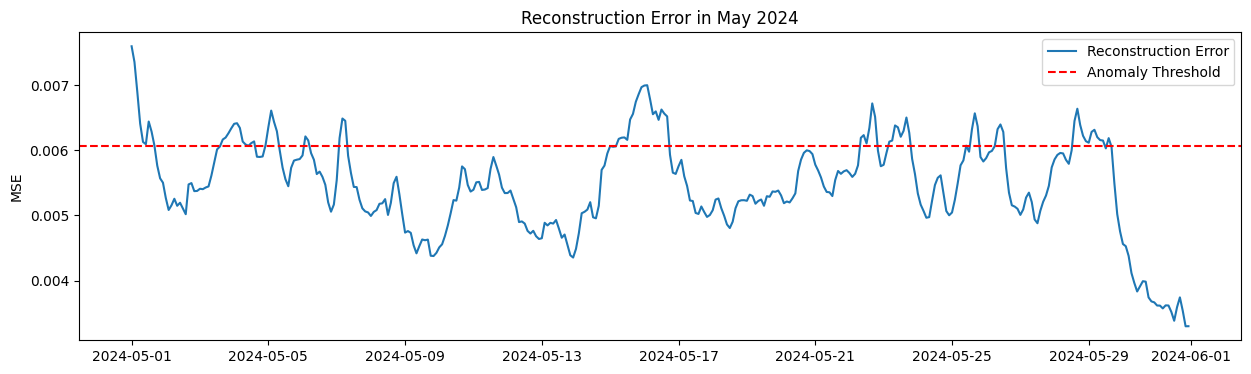

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot(may_errors["timestamp"], may_errors["error"], label="Reconstruction Error")
plt.axhline(threshold, color='red', linestyle='--', label="Anomaly Threshold")
plt.title("Reconstruction Error in May 2024")
plt.ylabel("MSE")
plt.legend()
plt.show()


In [ ]:
threshold = np.percentile(reconstruction_errors, 60)
anomaly_indices = np.where(reconstruction_errors > threshold)[0]
print(f"Found {len(anomaly_indices)} anomaly windows.")


Found 1636 anomaly windows.


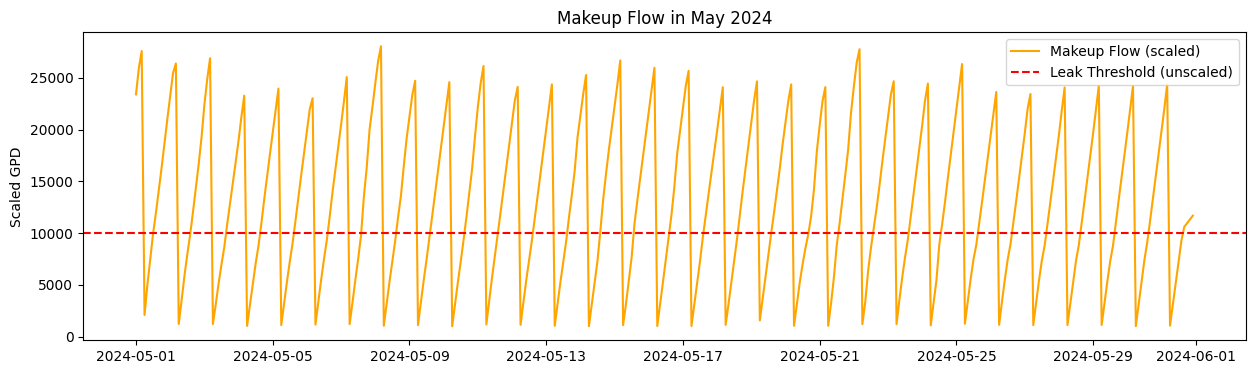

In [ ]:
makeup["Timestamp"] = pd.to_datetime(makeup["Timestamp"])
may_makeup = makeup[(makeup["Timestamp"] >= "2024-05-01") & (makeup["Timestamp"] < "2024-06-01")]

plt.figure(figsize=(15, 4))
plt.plot(may_makeup["Timestamp"], may_makeup["values"], color='orange', label="Makeup Flow (scaled)")
plt.axhline(10000, color='red', linestyle='--', label="Leak Threshold (unscaled)")
plt.title("Makeup Flow in May 2024")
plt.ylabel("Scaled GPD")
plt.legend()
plt.show()
